# COSC 301 Milestone 2 Jacob Harding & Rylan Cox
## Data Analysis of Kickstarter Projects

In [59]:
import pandas as pd
import seaborn as sns
import numpy as np
import sys
import os
import datetime
import matplotlib.pyplot as plt

# For how to import the scripts folder so that it can be used:
# https://stackoverflow.com/questions/53049195/importing-custom-module-into-jupyter-notebook
# https://stackoverflow.com/questions/49264194/import-py-file-in-another-directory-in-jupyter-notebook
sys.path.append('../scripts')

import project_functions
# relative import did not work for some reason
#from .. import project_functions

pathToData = '../../data/raw/ks-projects-201801.csv'

dfj = project_functions.load_and_process(pathToData, 'Jacob')
dfr = project_functions.load_and_process(pathToData, 'Rylan')

## Task 3 | Exploratory Data Analysis | Jacob

The info function gives information on all the columns and there associated types. The result shows that the 'load_and_process' function of the data pipeline has worked correctly as the new **'stateInt'** (int64), **'duration'** (timedelta64)\[ns\], and **'durationInt'** (int 64) columns needed for my analysis have been created with the correct types.

In [60]:
dfj.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 378657 entries, 0 to 378660
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype          
---  ------            --------------   -----          
 0   Name              378657 non-null  object         
 1   category          378657 non-null  object         
 2   main_category     378657 non-null  object         
 3   currency          378657 non-null  object         
 4   deadline          378657 non-null  object         
 5   launched          378657 non-null  object         
 6   pledged           378657 non-null  float64        
 7   state             378657 non-null  object         
 8   backers           378657 non-null  int64          
 9   country           378657 non-null  object         
 10  usd_pledged_real  378657 non-null  float64        
 11  usd_goal_real     378657 non-null  float64        
 12  stateInt          378657 non-null  int64          
 13  duration          378657 non-null  timedelta

This shows how many outlier projects there are in the dataset, for this I am considering projects with duration greater than 90 days to be outliers since there are relatively few greater than that.

In [61]:
outlierProjects = dfj[dfj['durationInt'] > 90]
print(f"There are {outlierProjects.shape[0]} projects in the dataset with duration greater 90 days out of a total of {dfj.shape[0]} projects")

There are 29 projects in the dataset with duration greater 90 days out of a total of 378657 projects


In [62]:
dfj.describe().T

,count,mean,std,min,25%,50%,75%,max
pledged,378657,9683.08,95636.5,0,30,620,4076,2.0339e+07
backers,378657,105.619,907.19,0,2,12,56,219382
usd_pledged_real,378657,9059.02,90973.8,0,31,624.38,4050,2.0339e+07
usd_goal_real,378657,45454.2,1.15296e+06,0.01,2000,5500,15500,1.66361e+08
stateInt,378657,0.642756,0.830139,0,0,0,1,5
duration,378657,33 days 21:58:11.079641964,65 days 21:55:37.956863723,0 days 00:07:17,29 days 02:20:37,29 days 16:32:32,36 days 15:35:44,16738 days 23:00:00
percentFunded,378657,323.615,26690.7,0,0.453333,13.4665,106.54,1.04278e+07
durationInt,378657,33.4811,65.9095,0,29,29,36,16738


These two plots below show the distribution of Kickstarter projects based on the duration of the project by count and probability. Interestingly, this shows that 1 month long projects are the majority of projects composing about 47% of all projects. 2 month long and 1.5 month long projects are the next most common.

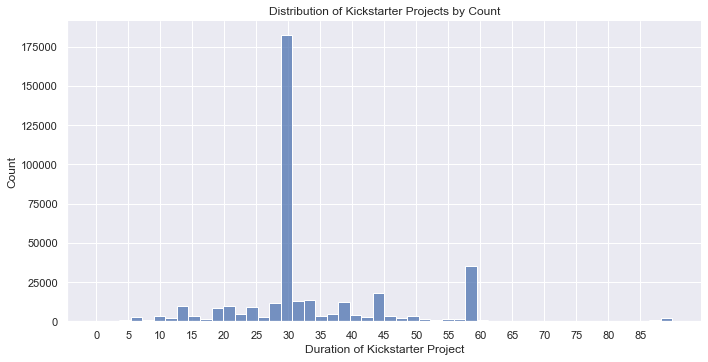

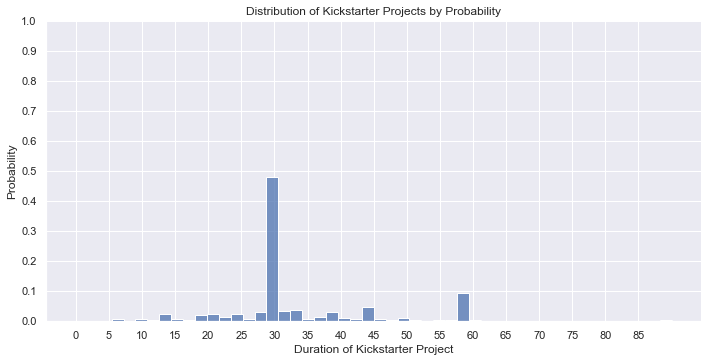

In [63]:
axes = sns.displot(data=dfj[dfj['durationInt'].between(0, 90)], x='durationInt', aspect=2.0, bins=50).set(title='Distribution of Kickstarter Projects by Count')
#axes = sns.displot(data=df, x='durationInt', aspect=2.0)
axes.set_axis_labels('Duration of Kickstarter Project', 'Count')
# https://seaborn.pydata.org/generated/seaborn.FacetGrid.html#seaborn.FacetGrid
axes.set(xticks=np.arange(0, 90, 5))


# Learned how to use 'stat' parameter to get bins by probability and not count from user miro from here:
# https://stackoverflow.com/questions/40092294/creating-a-matplotlib-or-seaborn-histogram-which-uses-percent-rather-than-count
axes = sns.displot(data=dfj[dfj['durationInt'].between(0, 90)], x='durationInt', aspect=2.0, bins=50, stat='probability').set(title='Distribution of Kickstarter Projects by Probability')
axes.set_axis_labels('Duration of Kickstarter Project', 'Probability')
axes.set(xticks=np.arange(0, 90, 5), yticks=np.arange(0,1.1,0.1))

Here is another interesting plot which shows the distribution of the different possible states of a project. Since my research question is focused on how the duration of a project affects it success, I am going to focus on projects which have the states of 'failed/canceled' or 'successful'. The other states do not provide information that I need about the success so they will be filtered out.

Text(0.5, 1.0, 'Distribution of Project States')

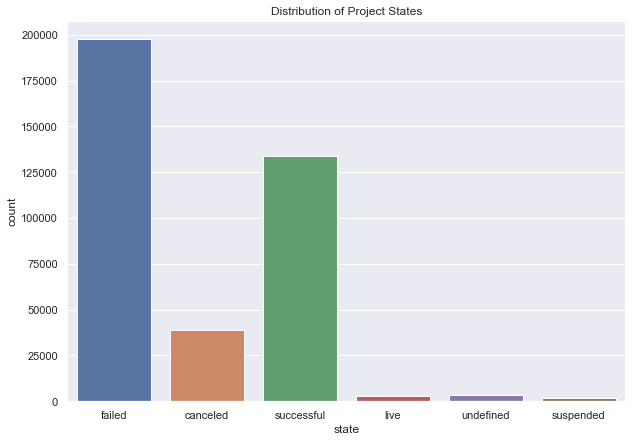

In [66]:
sns.countplot(x='state', data=dfj)
plt.title('Distribution of Project States')

This graph here shows how the duration of projects is distributed by category which helps show that the category may affect my analysis and research question

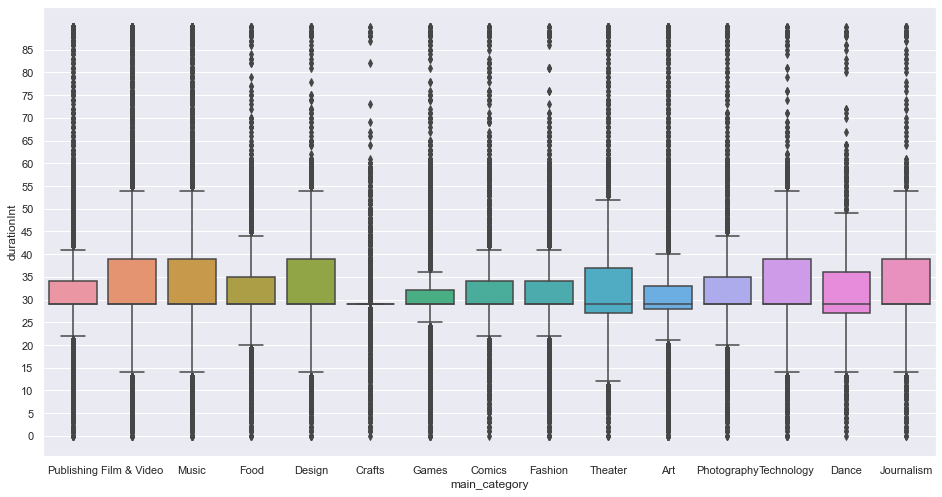

In [67]:
# Learned how to change seaborn plot size from user 'student' here:
# https://stackoverflow.com/questions/31594549/how-do-i-change-the-figure-size-for-a-seaborn-plot
sns.set(rc={'figure.figsize':(16,8.27)})
box1 = sns.boxplot(data=dfj[dfj['durationInt'].between(0, 90)], y='durationInt', x='main_category')
box1.set(yticks=np.arange(0,90,5))
print()

Here's a pair plot that shows plots between duration, percent funded, and project goal amount. Interestingly as duration increases project funding goal seems to increase as well.

(450, 16)


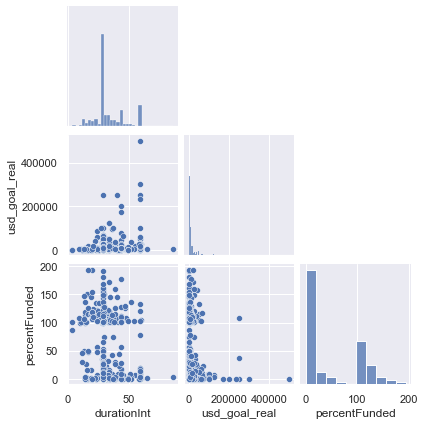

In [68]:
dfWithOutliersRemoved = dfj[dfj['durationInt'].between(0, 90) & dfj['percentFunded'].between(0, 200) & dfj['usd_goal_real'].between(0, 1000000)].head(450)
print(dfWithOutliersRemoved.shape)
sns.pairplot(dfWithOutliersRemoved[['durationInt', 'usd_goal_real', 'percentFunded']], height=2, corner=True)

## Task 3 | Exploratory Data Analysis | Rylan

In [69]:
dfr.shape

(159141, 6)

In [70]:
dfr.head()

,name,category,state,pledged,goal,plus_minus
4,Community Film Project: The Art of Neighborhoo...,Film & Video,canceled,1283.00,19500.0,-1283.00
5,Monarch Espresso Bar,Food,successful,52375.00,50000.0,52375.00
6,Support Solar Roasted Coffee & Green Energy! ...,Food,successful,1205.00,1000.0,1205.00
9,STUDIO IN THE SKY - A Documentary Feature Film...,Film & Video,canceled,6240.57,65000.0,-6240.57
11,Lisa Lim New CD!,Music,successful,12700.00,12500.0,12700.00


In [71]:
dfr.columns

Index(['name', 'category', 'state', 'pledged', 'goal', 'plus_minus'], dtype='object')

In [72]:
dfr.nunique(axis=0)

name          158488
category          15
state              3
pledged        76461
goal           24491
plus_minus     81207
dtype: int64

In [73]:
dfr.describe().apply(lambda s: s.apply('{0:.5f}'.format))
#https://stackoverflow.com/questions/40347689/dataframe-describe-suppress-scientific-notation/47207283

,pledged,goal,plus_minus
count,159141.00000,159141.00000,159141.00000
mean,16818.21045,10042.02059,15830.92082
std,103946.59652,15495.90616,104101.53351
min,1.00000,0.01000,-1076751.05000
25%,1202.00000,1500.00000,811.00000
50%,3925.97000,4500.00000,3516.53000
75%,10971.00000,10213.91000,10550.00000
max,13285226.36000,100000.00000,13285226.36000


<AxesSubplot:xlabel='category', ylabel='pledged'>

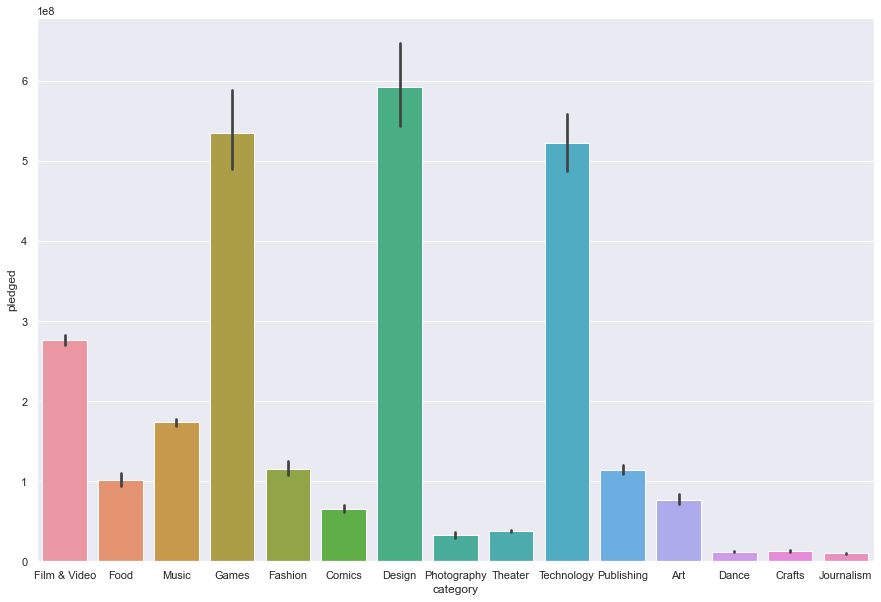

In [74]:
sns.set(rc={'figure.figsize': (15,10)})
sns.barplot(data=dfr,x='category',y='pledged',estimator=np.sum)
#https://stackoverflow.com/questions/31594549/how-do-i-change-the-figure-size-for-a-seaborn-plot
#https://www.youtube.com/watch?v=6GUZXDef2U0&ab_channel=DerekBanas

<AxesSubplot:xlabel='category', ylabel='pledged'>

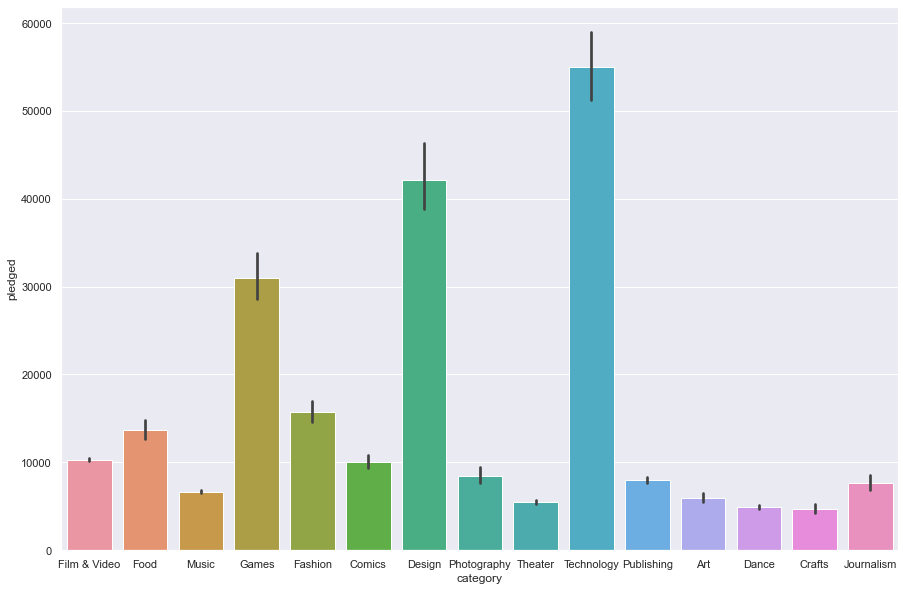

In [75]:
sns.set(rc={'figure.figsize': (15,10)})
sns.barplot(data=dfr,x='category',y='pledged',estimator=np.mean)

<AxesSubplot:xlabel='category', ylabel='plus_minus'>

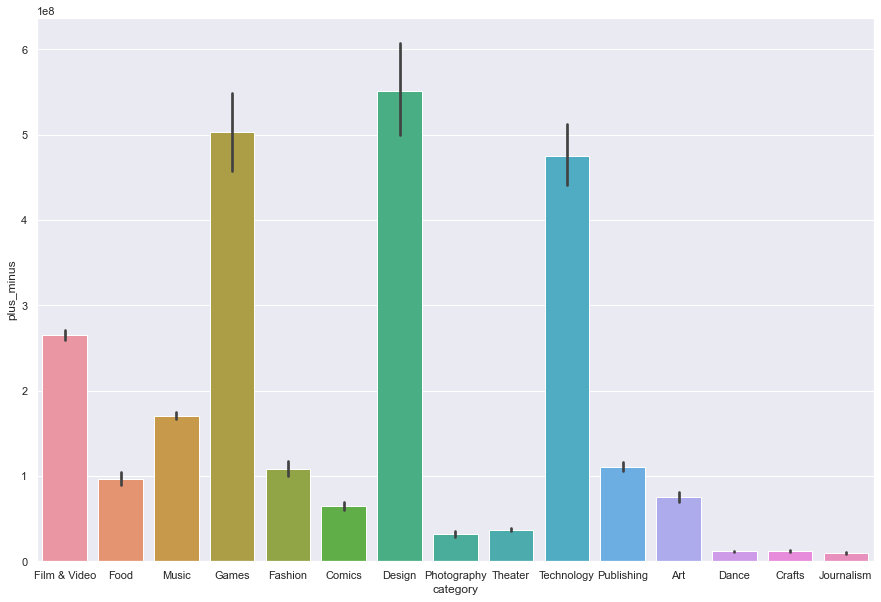

In [76]:
sns.set(rc={'figure.figsize': (15,10)})
sns.barplot(data=dfr,x='category',y='plus_minus',estimator=np.sum)

<AxesSubplot:xlabel='category', ylabel='count'>

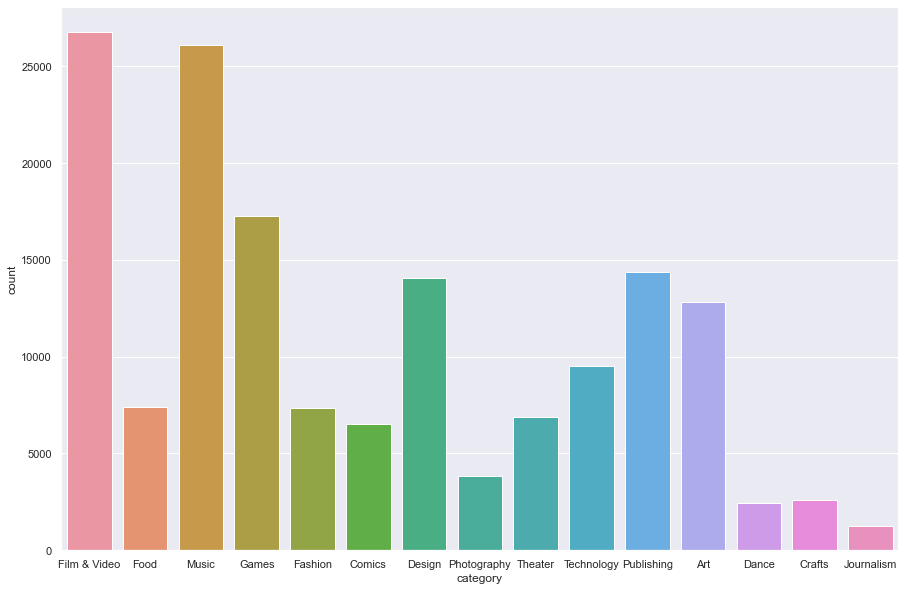

In [77]:
sns.countplot(x='category',data=dfr)

<AxesSubplot:ylabel='category'>

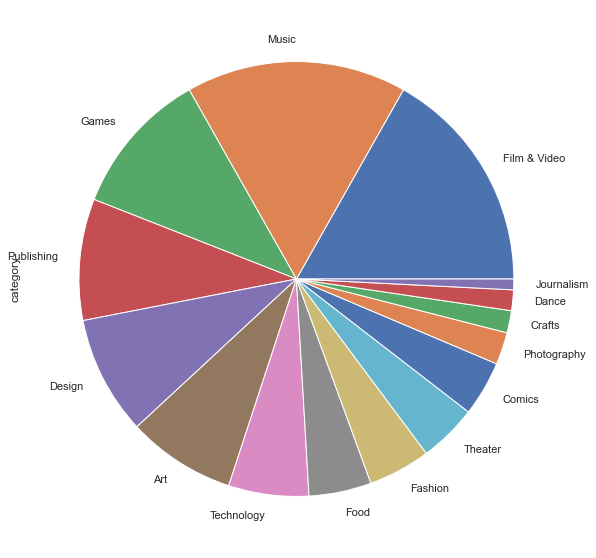

In [78]:
dfr['category'].value_counts().plot.pie()
#https://www.dataforeverybody.com/matplotlib-seaborn-pie-charts/

<AxesSubplot:xlabel='category', ylabel='goal'>

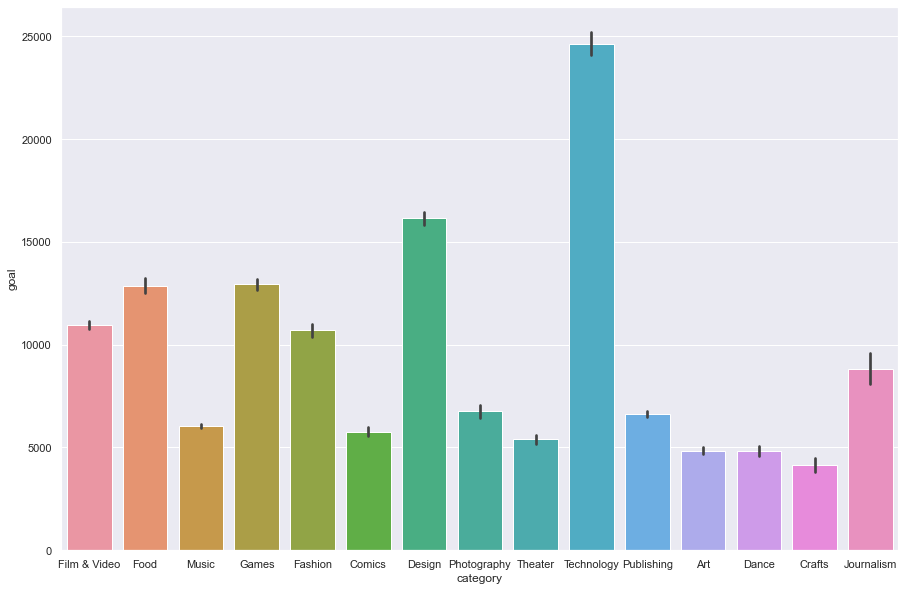

In [79]:
sns.set(rc={'figure.figsize': (15,10)})
sns.barplot(data=dfr,x='category',y='goal',estimator=np.mean)

## Task 4 | Research Question Analysis | Jacob

Jacob's research question: Does the funding duration of a Kickstarter project affect its success?

---

One way to test this research question is to create a correlation matrix where the correlation between each pair of numeric variables in the dataset can be seen.

<AxesSubplot:>

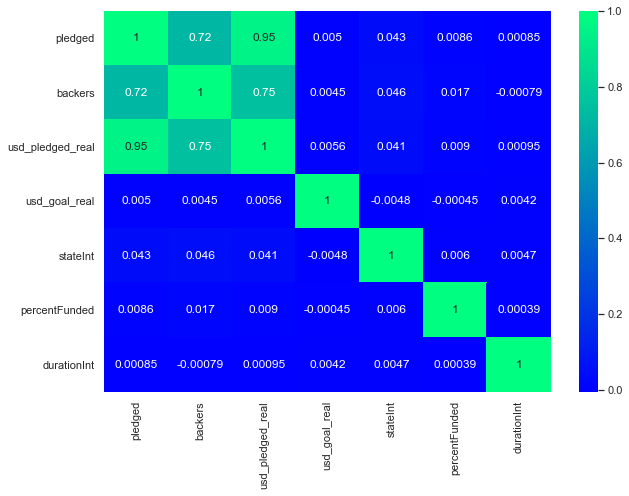

In [80]:
# Learned how to change seaborn plot size from user 'student' here:
# https://stackoverflow.com/questions/31594549/how-do-i-change-the-figure-size-for-a-seaborn-plot
sns.set(rc={'figure.figsize':(10,7)})

corr = dfj.corr()
sns.heatmap(corr, annot=True, cmap='winter')

In this plot above, I am interested in the correlation between how funded the project was (percentFunded) and the duration of the project (durationInt). Here it shows a correlation of -0.024 which is a first indicator that the duration of the Kickstarter project may not affect its success.

Here is another plot which helps show visually that duration of the project may actually be related to the success of the project. It shows that projects that have a really short duration have a smaller percent funded and the percent funded peaks around ~30 days and then gradually decreases until increasing again at 60 days. Interestingly we can see that the amount of projects increases around 100%, but before 100% the amount of projects is not as many. I think this may be because once a project is close to being funded (80%-90%) it may be that more backers will fund the project to push it to reach 100% since it is so close to reaching its goal.

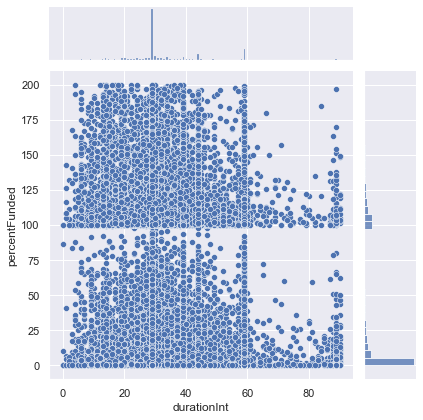

In [81]:
df2 = dfj[dfj['percentFunded'].between(0, 200) & dfj['durationInt'].between(0, 90)].head(50000)
sns.jointplot(data=df2, x='durationInt', y='percentFunded')

Here is one of the main plots for this investigation. It shows the probability of success of the project versus how long the project's funding time was. It shows that there indeed is a variance in the success of projects based on how long they run. Interestingly, there are two main peaks for highest success. One at around ~10 days and another at ~66 days.

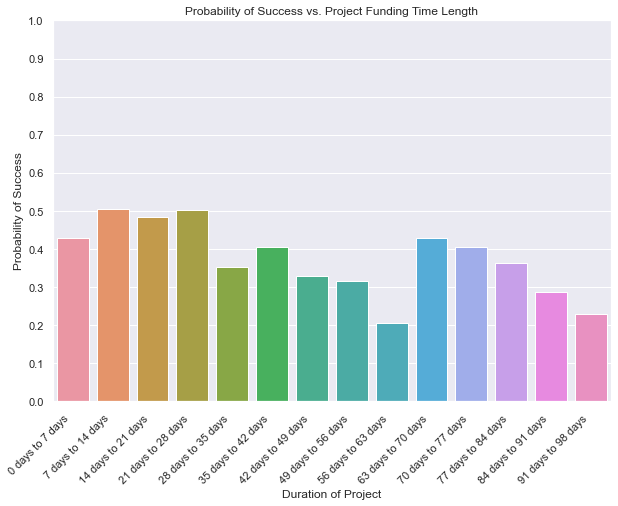

In [82]:

# Plot probability of success vs. project funding time length
df2 = project_functions.prepareDfForProbSuccessVSDuration(dfj)
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html?highlight=plot#pandas.DataFrame.plot
#df2.plot(kind='bar', x='formattedTimeIntervals', y='stateInt', ylabel='Probability of Success', xlabel='Duration of Project', ylim=(0,1), legend=False, title='Probability of Success vs. Project Funding Time Length')
ax = sns.barplot(data=df2, x='formattedTimeIntervals', y='stateInt')
plt.title('Probability of Success vs. Project Funding Time Length')
plt.xlabel('Duration of Project')
plt.ylabel('Probability of Success')
plt.yticks(np.arange(0,1.1,0.1))
# for help rotating x_tick labels:
# https://stackoverflow.com/questions/61368851/how-to-rotate-seaborn-barplot-x-axis-tick-labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
print()

This part gets the probability of success for projects that have a funding time in between 63 and 70 days and plots it by category. Here it shows that probability of success varies with the category, so the category may also affect how a project's success varies with funding duration.

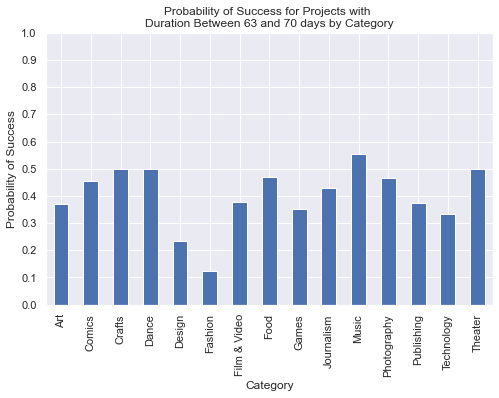

In [48]:
plt.figure(figsize=(8,5))

dfNew = project_functions.getProjectsWithDurationInTimeRange(dfj, 63, 70)
dfNew = project_functions.getProjectsAsFailedOrSuccessful(dfNew)
#print(dfNew.nunique(axis=0))
#print(f"mean: {dfNew['stateInt'].mean()}")
dfTest = dfNew.groupby('main_category')['stateInt'].mean().plot(kind='bar').set(title='Probability of Success for Projects with \nDuration Between 63 and 70 days by Category')
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xlabel('Category')
plt.ylabel('Probability of Success')
print()

Here the plot is for projects between 0 and 7 days of funding duration. Here we see that fashion projects' probabilty of success has increased but crafts' has decreased, so category may affect how duration of funding affect's a project's success.

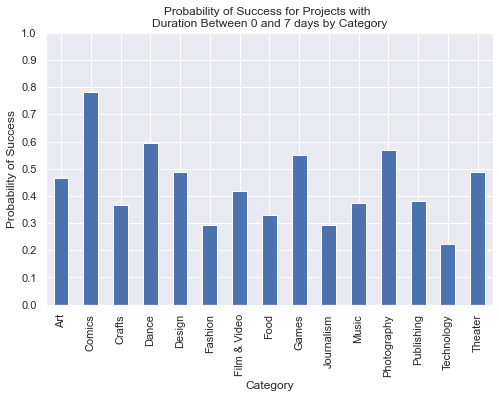

In [47]:
plt.figure(figsize=(8,5))
dfNew2 = project_functions.getProjectsWithDurationInTimeRange(dfj, 0, 7)
dfNew2 = project_functions.getProjectsAsFailedOrSuccessful(dfNew2)
dfTest2 = dfNew2.groupby('main_category')['stateInt'].mean().plot(kind='bar').set(title='Probability of Success for Projects with \nDuration Between 0 and 7 days by Category')
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xlabel('Category')
plt.ylabel('Probability of Success')
print()

The plot below takes the information learned above and shows that projects in different categories do vary slightly in their success relative to their funding duration with some going down when others go up. However overall they do actually follow a similar curve relative to funding duration.

Index(['stateInt', 'duration2', 'category2'], dtype='object')


Text(0.5, 1.0, 'Probability of Project Success vs Funding Duration By Category')

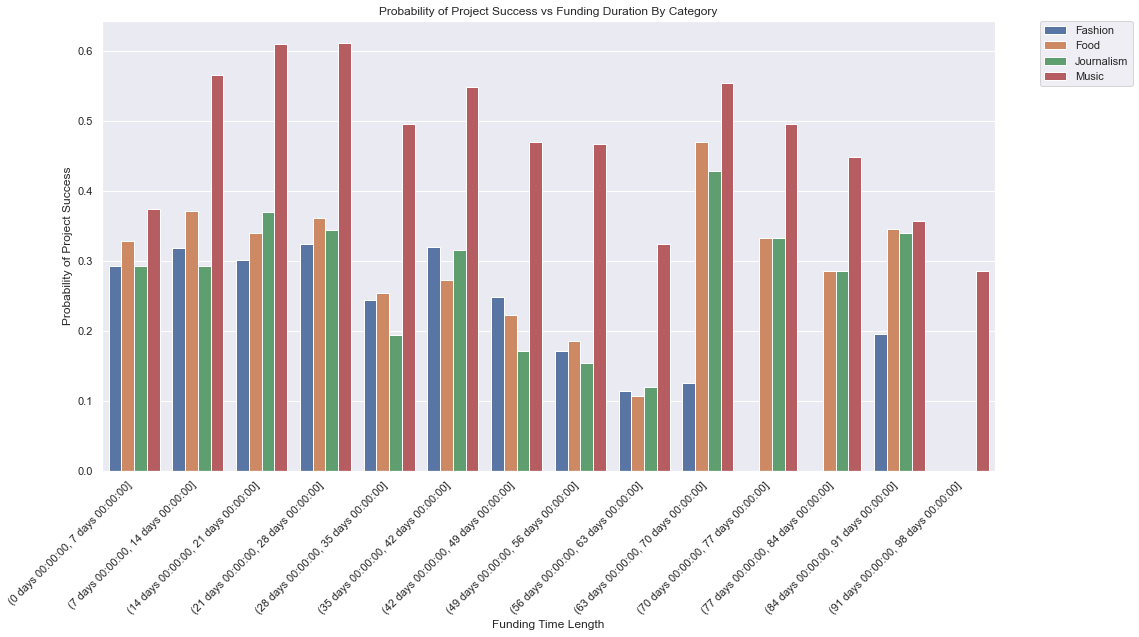

In [83]:
import matplotlib.pyplot as plt

# Learned how to change seaborn plot size from user 'student' here:
# https://stackoverflow.com/questions/31594549/how-do-i-change-the-figure-size-for-a-seaborn-plot
sns.set(rc={'figure.figsize':(16,8.27)})

dfByCategory = project_functions.prepareDfForProbSuccessVSDurationByCategories(dfj)

a = sns.barplot(data=dfByCategory, x='duration2', y='stateInt', hue='category2')
# for help rotating x_tick labels:
# https://stackoverflow.com/questions/61368851/how-to-rotate-seaborn-barplot-x-axis-tick-labels
a.set_xticklabels(a.get_xticklabels(), rotation=45, horizontalalignment='right')
# https://stackoverflow.com/questions/31632637/label-axes-on-seaborn-barplot
a.set(xlabel='Funding Time Length', ylabel='Probability of Project Success')

#plt.legend(loc='upper left')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Probability of Project Success vs Funding Duration By Category')

Based on the inital correlation matrix, it seemed as though there wasn't a relationship between the project funding duration and the probability of the project's success. **However, after ploting the probability of success vs project duration a relationship between the two variables was found, although non-linear**. Because the relationship is non-linear that may be why the correlation matrix did not show a relationship between the two variables. Based on the graphs, a project success peaks if it has a > 7 day < 30 days duration. This makes sense as if a project doesn't have too long to be funded it may incentivised a potential backer to back right away lessening the probability that they forget about the project. Also project success dips somewhat lower if it is < 7 days and this also makes sense. If a project only has a funding duration of 1 week less people are likely to be able to see it and the news of the project may not reach enough people.

Lastly, projects in different categories had overall different probabilities of success, however they did follow similar curves in their probability of success relative to funding duration.

## Task 4 | Research Question Analysis | Rylan

Rylan's research question: Which categories have the most successful dollar spent?

To answer this question the first thing I looked into what how much money was spent in each category. That produced these two graphs comparing the average pledge total and the sum pledged totals.

Text(0.5, 0, 'Categories')

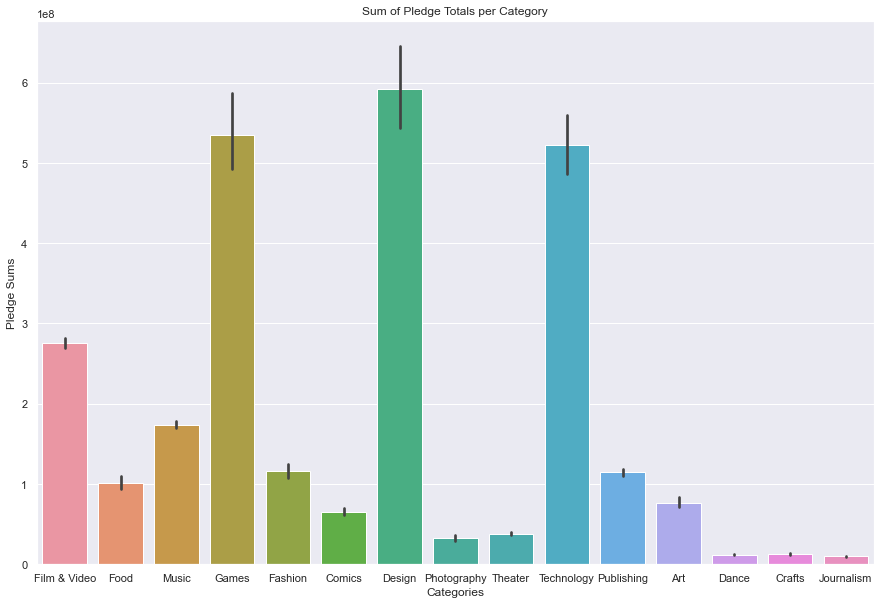

In [84]:
sns.color_palette("husl", 8)
sns.set(rc={'figure.figsize': (15,10)})
sns.barplot(data=dfr,x='category',y='pledged',estimator=np.sum)
plt.title('Sum of Pledge Totals per Category')
plt.ylabel('Pledge Sums')
plt.xlabel('Categories')

Text(0.5, 0, 'Categories')

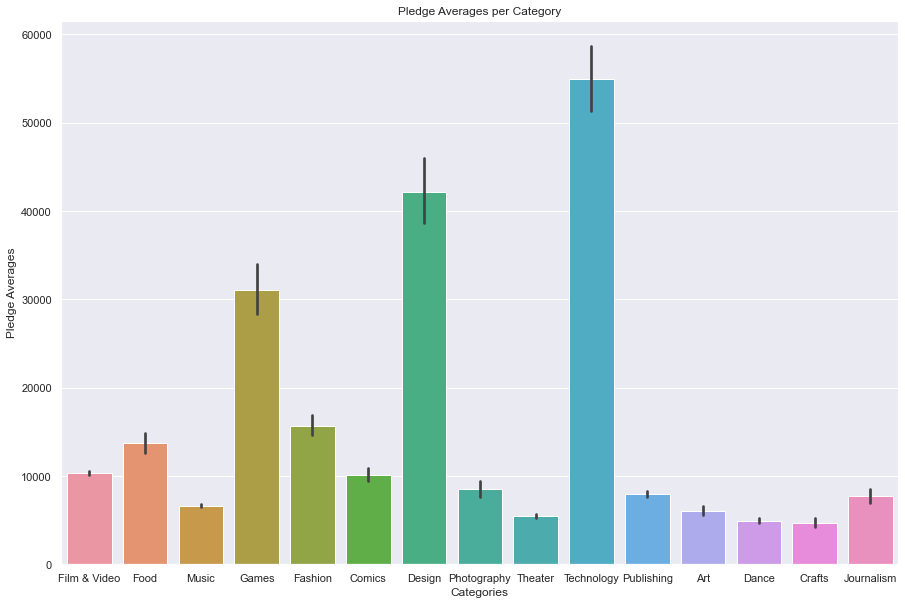

In [44]:
sns.set(rc={'figure.figsize': (15,10)})
sns.barplot(data=dfr,x='category',y='pledged',estimator=np.mean)
plt.title('Pledge Averages per Category')
plt.ylabel('Pledge Averages')
plt.xlabel('Categories')

With these graphs we are now able to tell how much money is put into each category. Technology having the highest average pledge total while design has the most money pledged. The issue with this is this does not tell us how much **successful** money was spent. In order to do that I created a Plus Minus category that was a positive pledge total if the campaign was a success, but was a negative pledge total if it was a failure. The graph below shows the sums of the Plus Minus category.

Text(0.5, 0, 'Categories')

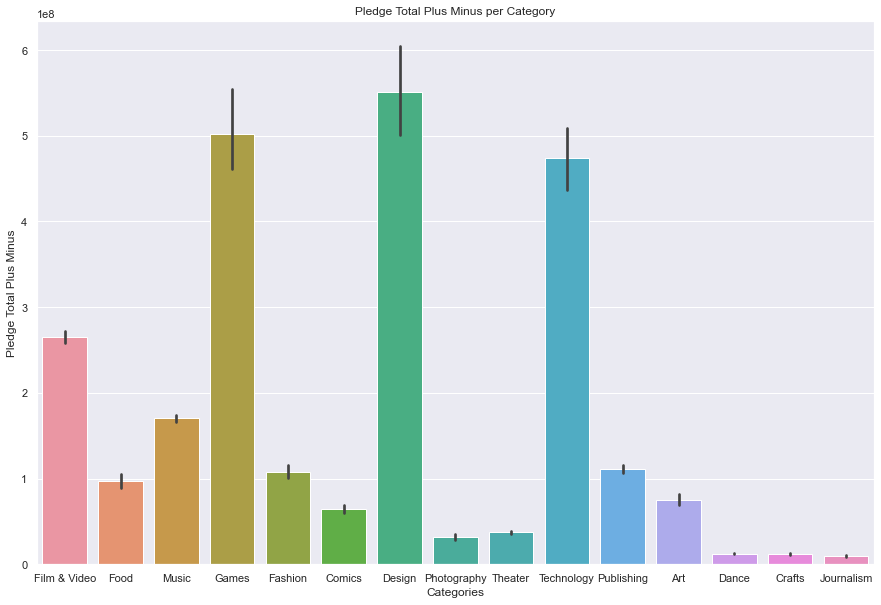

In [45]:
sns.set(rc={'figure.figsize': (15,10)})
sns.barplot(data=dfr,x='category',y='plus_minus',estimator=np.sum)
plt.title('Pledge Total Plus Minus per Category')
plt.ylabel('Pledge Total Plus Minus')
plt.xlabel('Categories')

Looking at this it is easy to see that the largest amount of successful dollars is spent on Design, Games, Technology, and Film & Video in that order. Although, this does not tell us what would give the user the highest success chance in spending their money. If we look at the graphs below we will see that there is a disproportionate amount of campaigns per category that could change the outcome. 

Text(0, 0.5, '')

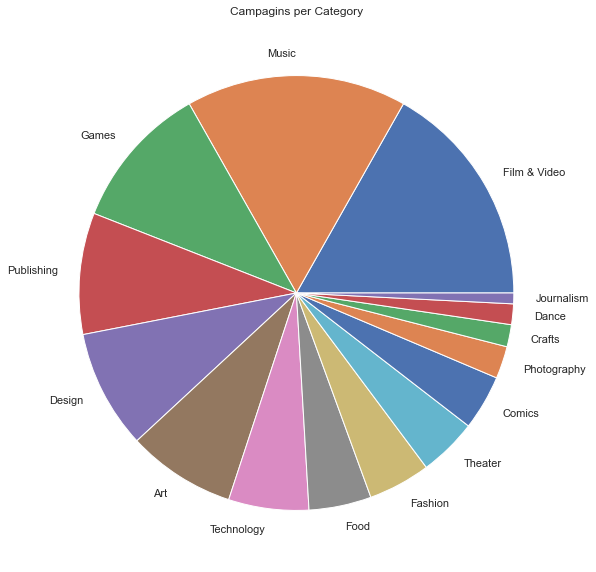

In [46]:
dfr['category'].value_counts().plot.pie()
plt.title('Campagins per Category')
plt.ylabel('')

By looking at the pie chart we can discern that the largest amount of Campaigns on Kickstarter are Film & Video, but I will also draw your attention to the fact that design has more campaigns total than technology does. So now if we look at the average of these pledges we can determine which category has the highest average Plus Minus, or amount of succesful dollars per campaign.

Text(0.5, 0, 'Categories')

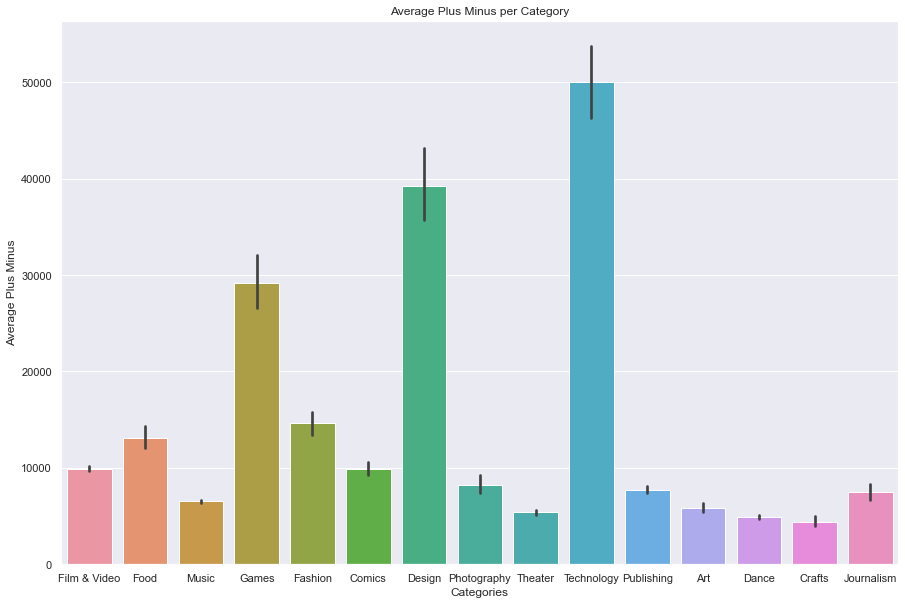

In [47]:
sns.set(rc={'figure.figsize': (15,10)})
sns.barplot(data=dfr,x='category',y='plus_minus',estimator=np.mean)
plt.title('Average Plus Minus per Category')
plt.ylabel('Average Plus Minus')
plt.xlabel('Categories')

Showing ultimately in the end that when taken into account for amount of campaigns, Technology, Design, Games, and Fashion have the most average successful dollars. We can see that Film & Video take a substantial hit because they have the largest amount of campaigns. Meanwhile, Fashion and Food get quite the boost becoming the fourth and fifth best options.